Eva Sibinga
Assignment 3
3/9/20
Prof. Timothy Shortell - Working With Data
CUNY Graduate Center

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
chicagoDF = pd.read_json('https://data.cityofchicago.org/resource/kn9c-c2s2.json')
chicagoDF.head()

,ca,community_area_name,hardship_index,per_capita_income_,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,percent_households_below_poverty,percent_of_housing_crowded
0,1.0,Rogers Park,39.0,23939,8.7,18.2,27.5,23.6,7.7
1,2.0,West Ridge,46.0,23040,8.8,20.8,38.5,17.2,7.8
2,3.0,Uptown,20.0,35787,8.9,11.8,22.2,24.0,3.8
3,4.0,Lincoln Square,17.0,37524,8.2,13.4,25.5,10.9,3.4
4,5.0,North Center,6.0,57123,5.2,4.5,26.2,7.5,0.3


In [5]:
cols_to_drop = ["percent_aged_16_unemployed", "percent_aged_25_without_high_school_diploma"]

In [7]:
chicagoDF = chicagoDF.drop(cols_to_drop, axis=1)

In [9]:
chicagoDF.head()

,ca,community_area_name,hardship_index,per_capita_income_,percent_aged_under_18_or_over_64,percent_households_below_poverty,percent_of_housing_crowded
0,1.0,Rogers Park,39.0,23939,27.5,23.6,7.7
1,2.0,West Ridge,46.0,23040,38.5,17.2,7.8
2,3.0,Uptown,20.0,35787,22.2,24.0,3.8
3,4.0,Lincoln Square,17.0,37524,25.5,10.9,3.4
4,5.0,North Center,6.0,57123,26.2,7.5,0.3


In [10]:
chicagoDF['percap_income_dividedby_hardship_index'] = chicagoDF['per_capita_income_']/chicagoDF['hardship_index']

In [11]:
chicagoDF.head()

,ca,community_area_name,hardship_index,per_capita_income_,percent_aged_under_18_or_over_64,percent_households_below_poverty,percent_of_housing_crowded,percap_income_dividedby_hardship_index
0,1.0,Rogers Park,39.0,23939,27.5,23.6,7.7,613.820513
1,2.0,West Ridge,46.0,23040,38.5,17.2,7.8,500.869565
2,3.0,Uptown,20.0,35787,22.2,24.0,3.8,1789.350000
3,4.0,Lincoln Square,17.0,37524,25.5,10.9,3.4,2207.294118
4,5.0,North Center,6.0,57123,26.2,7.5,0.3,9520.500000


In [12]:
chicagoDF.to_csv('chicagoDF.csv')

In [14]:
x = chicagoDF['hardship_index']
y = chicagoDF['per_capita_income_']

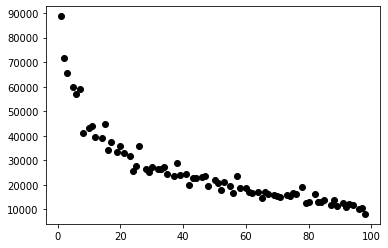

In [20]:
plt.plot(x,y, 'o', color='black');

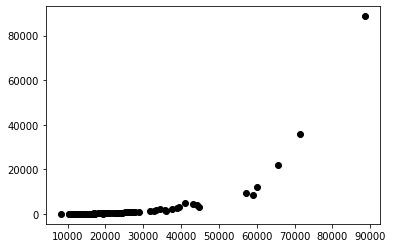

In [18]:
z = chicagoDF['percap_income_dividedby_hardship_index']
y = chicagoDF['per_capita_income_']

plt.plot(y,z, 'o', color='black');

#6. The first graph shows the relationship between hardship index and per capita income. There's a strong negative correlation: as per capita income decreases, hardship score increases, with few deviations away from the trend. This suggests that income is a strong predictor of hardship score, and more generally that income has a big impact on the relative hardship of a life (as measured by this score). I'd definitely like to know more about what the hardship score means and how it is used. I can think of several ways in which the score might help to distribute resources equitably or decide who to help first, and also think of many ways in which a general hardship score could be misinterpreted, abused, or used prescriptively to write off people it's ostensibly supposed to help. 

#6. (extra graph) I was also curious about dividing income by hardship index, which is what the second graph shows. I'm not sure if this is statistically sound, but mathematically it makes sense to me that there's more distribution at the top. At the bottom, the fraction will approach 1 as the income gets lower and hardship index gets higher, and on the other end, the numerator is limited mostly by income as hardship index gets exponentially lower. I think the visualization (if it's statistically viable) helps to show how many MORE data points are at the low end of the spectrum than at the high end. That being said, I'm curious to know if the graph would be considered misleading.

#7. Which values in this dataframe have the largest impact (i.e. are most strongly correlated) with the hardship score? How is the hardship score determined? Graphing the correlation between hardship score and income returned an obvious connection. Is there just as strong of a connection between crowded housing and hardship? It's hard to argue that living below the poverty line could make anyone's life less hard, but it seems more possible that there could be some positive factors to living in close quarters with other people, even if crowded housing has a net-negative impact. ... Let's just check it out:

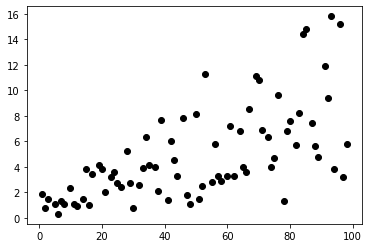

In [21]:
x = chicagoDF['hardship_index']
w = chicagoDF['percent_of_housing_crowded']
plt.plot(x,w, 'o', color='black');

This graph looks quite different from the hardship score/income graph. It shows a weaker correlation between hardship score and crowded housing, since there are more points that do not fit the line of regression. That being said, it says loud and clear that there are not crowded houses with low hardship indices, although the reverse may be true. So crowded housing is not as good a predictor of hardship score as income is, since it is possible to have un-crowded housing and still have a high hardship score, but it is not possible to have high income and a high hardship score. 